# Multivariate Regression & Polynomial Features

In this notebook, we will cover:
1. Scatterplots, pairplots, and correlation matrix
1. Multivariate regression
1. Polynomial features, scaling, pipelines

We will use a dataset contained in the ```sklearn``` package:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets

dataset = datasets.load_diabetes(as_frame = True, scaled = False)
df = dataset['frame']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [2]:
# Print the dataset description
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Let's recap how to plot a scatterplot:

<Axes: xlabel='bp', ylabel='target'>

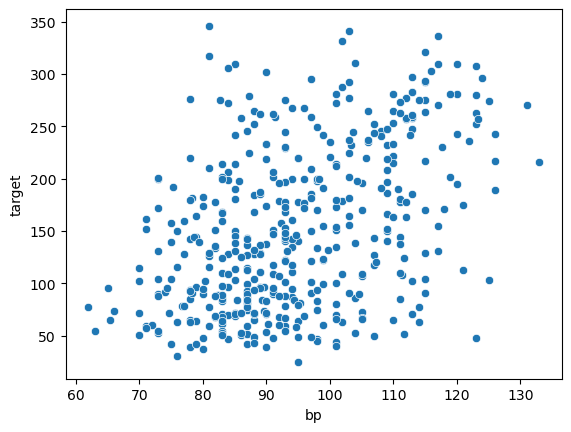

In [3]:
sns.scatterplot(data = df, x = 'bp', y = 'target')

If we repeat this one by one for each pair of numerical variables, we can try to see if there are any trends or relationships between them.

Seaborn has a nice ```pairplot``` function that saves us some work. It plots the following things in a large table:
1. Histograms
1. Scatterplots
1. Linear regression lines

As we have many columns, let's restrict ourselves to just a few variables at once:

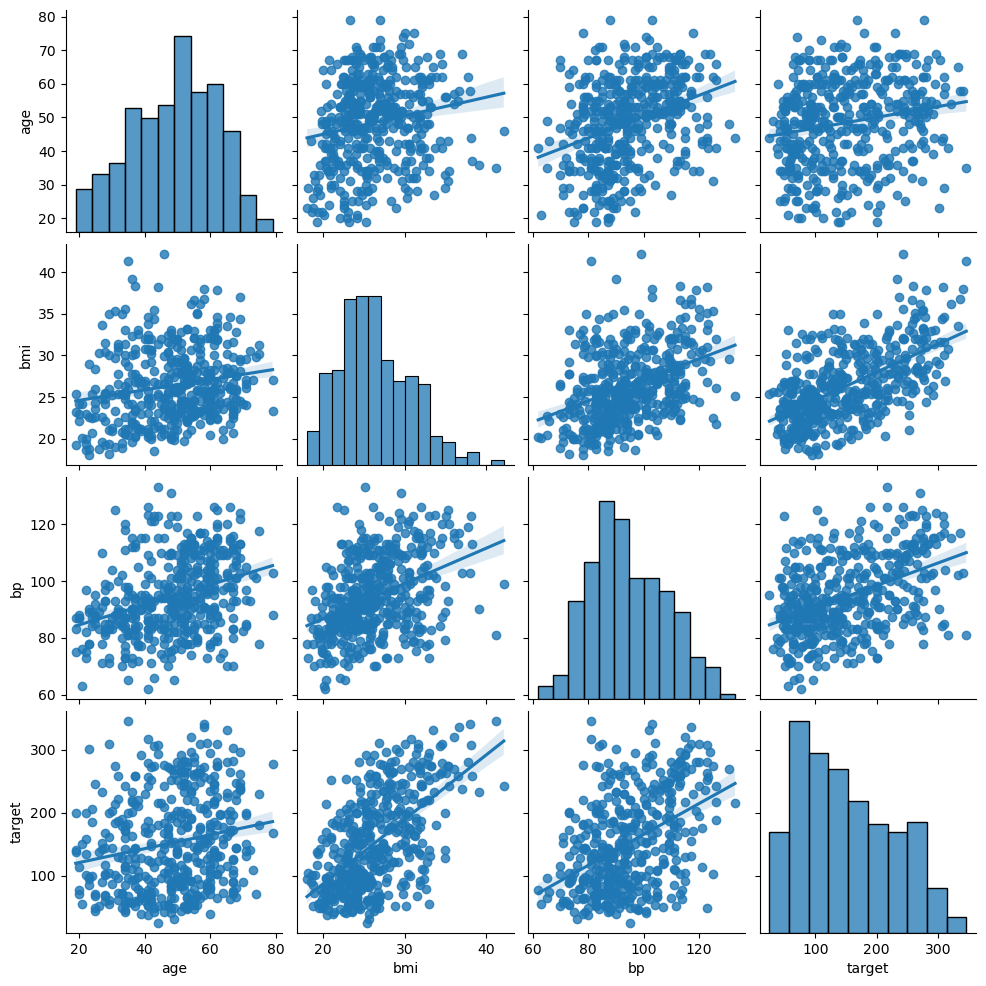

In [4]:
sns.pairplot(df[['age', 'bmi', 'bp', 'target']], kind = 'reg')

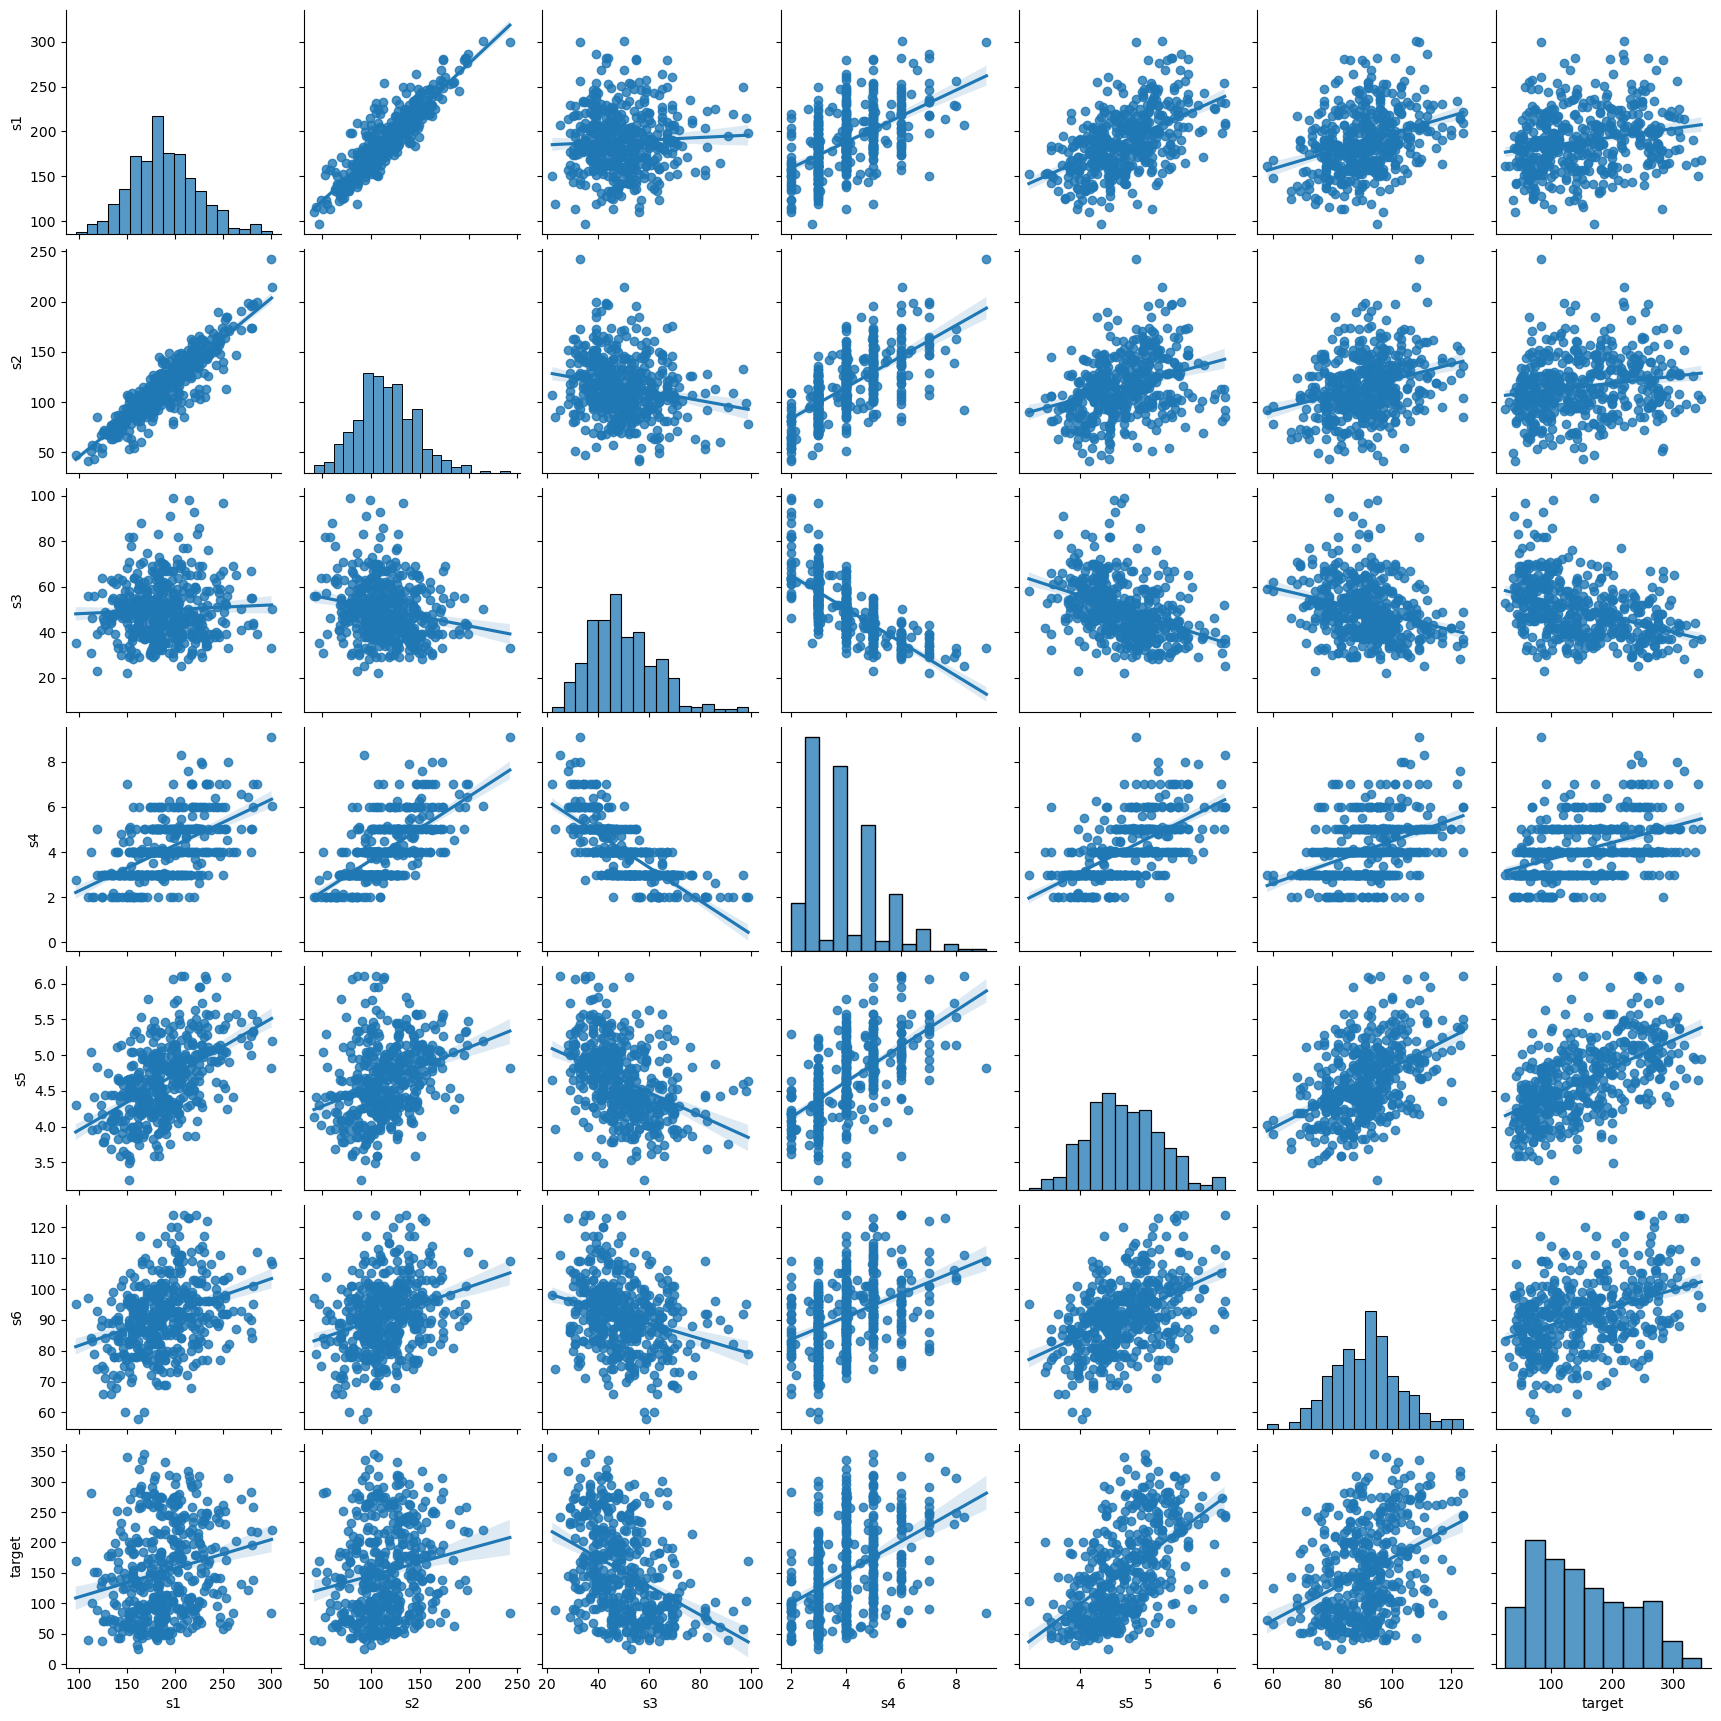

In [5]:
sns.pairplot(df[['s1', 's2', 's3', 's4', 's5', 's6', 'target']], kind = 'reg')

Setting ```kind = 'reg'``` plots linear regression lines between pairs of variables. If you don't want that, you can just remove that parameter.

From the scatter plots, we can already see some relationships between variables. To quantify these relationships, we can compute a correlation matrix:

In [6]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Let's add a bit of styling to make the numbers more obvious:

In [7]:
df.corr().style.background_gradient(cmap='bwr_r', vmin = -1, vmax = 1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


From the correlation matrix (or from the pairplot), we can see that ```bmi``` and ```s5``` are the most positively correlated with our target, and ```s3``` is the most negatively correlated.

# Multi-variate Regression

We've done some descriptive analytics. Let's move on to predictive analytics to see how well we can predict the target.

We've already learned how to do single-variable linear regression. Multi-variable linear regression is the same!

Let's first pick out some variables to be $X$ and $y$:

In [8]:
from sklearn.model_selection import train_test_split


X = df[['bmi', 'bp', 's4', 's5']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

We'll fit our model and compute the RMSE. We've seen most of this before.

One difference is that we're calling ```mean_squared_error``` with ```squared = False```. 

This gives us the RMSE, which is in the same units as the target variable.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred = lin.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

57.63170389546592

You can try different combinations of variables in $X$ to see which one minimizes the RMSE. But for this week, we will be happy with this.

Let's extract the regression coefficients:

In [10]:
lin.coef_

array([ 6.07199092,  0.73813599,  2.42653066, 46.53709225])

In [11]:
coeffs = pd.Series(index = X.columns, data = lin.coef_)
coeffs

bmi     6.071991
bp      0.738136
s4      2.426531
s5     46.537092
dtype: float64

Each of these tell us how much the target variable increases with a unit increase in that feature.

We might be tempted to conclude that ```s5``` is almost 8 times more important than ```bmi```. This would be **wrong**: we can't compare the importance of different variables yet, because our variables have different scales.

We should scale them first if we want to compare coefficients.

# Scaling our data
We can use sklearn's ```StandardScaler``` to scale our data such that they all have mean = 0 and standard deviation = 1.

```StandardScaler``` is an example of a pre-processing step.

Unlike models, which have fit and predict, pre-processing steps have fit and transform:

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaler.transform(X_train)

array([[ 0.73126719, -1.05547494, -0.85002074, -0.60168895],
       [-0.25390014, -0.11641575, -0.85002074, -0.95307777],
       [ 1.20146068,  1.18382004, -0.07129499, -0.57720932],
       ...,
       [-0.76887397,  1.32829068, -0.07129499,  0.27630121],
       [-0.29868047, -0.83876897,  0.70743076,  0.35301693],
       [ 0.35063436,  1.90617326, -0.85002074, -1.27516813]])

Let's re-run the regression with the scaled data:

In [13]:
lin = LinearRegression()
lin.fit(scaler.transform(X_train), y_train)   # <-- added scaling here...

y_pred = lin.predict(scaler.transform(X_test))  # <-- ... and here
mean_squared_error(y_test, y_pred, squared = False)

57.631703895465925

Notice that the RMSE hasn't changed: scaling multivariate linear regression does not affect how well our models performs. 

But if does affect the coefficients:

In [14]:
coeffs = pd.Series(index = X.columns, data = lin.coef_)
coeffs

bmi    27.119007
bp     10.218491
s4      3.116027
s5     24.143375
dtype: float64

Now we see that ```bmi``` is the most important variable, followed by ```s5``` and ```bp```, at least among the ones we included.

Although ```s4``` had high positive correlations with the target, it now has a much smaller regression coefficient! This means that it's relationship to the target is mostly captured by the other variables.

If we try with ```s3``` as well, we see that ```s4```'s coefficient can even become _negative_!

In [15]:
X = df[['bmi', 'bp', 's3', 's4', 's5']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

lin = LinearRegression()
scaler = StandardScaler()

scaler.fit(X_train)
lin.fit(scaler.transform(X_train), y_train)   # <-- added scaling here...

y_pred = lin.predict(scaler.transform(X_test))  # <-- ... and here
rmse = mean_squared_error(y_test, y_pred, squared = False)

print('RMSE:', rmse)

coeffs = pd.Series(index = X.columns, data = lin.coef_)
coeffs

RMSE: 56.91732541574567


bmi    25.682187
bp     10.140210
s3    -12.605281
s4     -6.793071
s5     26.109829
dtype: float64

**Lesson:** When doing multivariate regression, the coefficients depend on which other variables you included!

# Pipelines

It can get tedious to keep calling ```StandardScaler``` before using our model.

Sklearn's **pipelines** help us to chain these steps together easily.

A pipeline can contain any number of pre-processing or transformation steps (like ```StandardScaler```) followed by a model at the end.

In [16]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

A pipeline will have ```fit``` and ```predict``` methods, just like a model. In fact, you can treat it like a model for most things:

In [17]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

rmse = mean_squared_error(y_pred, y_test, squared = False)
rmse

56.91732541574567

This is the same as calling:

In [18]:
lin = LinearRegression()
scaler = StandardScaler()

scaler.fit(X_train)
lin.fit(scaler.transform(X_train), y_train)

y_pred = lin.predict(scaler.transform(X_test))

rmse = mean_squared_error(y_pred, y_test, squared = False)
rmse

56.91732541574567

To access the coefficients in our pipeline, we first need to extract the linear regression part of the pipeline.

We can get a list of all steps in a pipeline by calling ```named_steps```:

In [19]:
pipe.named_steps

{'standardscaler': StandardScaler(), 'linearregression': LinearRegression()}

In [20]:
pipe.named_steps['linearregression']

LinearRegression()

We can then extract coefficients from the linear regression part as we did before:

In [21]:
pipe.named_steps['linearregression'].coef_

array([ 25.68218678,  10.14020981, -12.60528126,  -6.79307083,
        26.10982908])

Let's put it all together, and simply call our pipeline ```lin``` instead of ```pipe```:

In [22]:
X = df[['bmi', 'bp', 's3', 's4', 's5']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

lin = make_pipeline(StandardScaler(), LinearRegression())

lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

rmse = mean_squared_error(y_pred, y_test, squared = False)

print('RMSE:', rmse)

coeffs = pd.Series(index = X.columns, data = lin.named_steps['linearregression'].coef_)
coeffs

RMSE: 56.91732541574567


bmi    25.682187
bp     10.140210
s3    -12.605281
s4     -6.793071
s5     26.109829
dtype: float64

# Polynomial features

We learned that we can do polynomial regression by adding extra features (columns) representing the powers of our variables, and then doing multiple regression.

Sklearn has a ```PolynomialFeatures``` transformer that helps us generate these features automatically:

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)  # <-- specify the degree here

X_train_poly = poly.fit_transform(X_train)

print("Number of cols in X_train:", X_train.shape[1])
print("Number of cols in X_train_poly:", X_train_poly.shape[1])

Number of cols in X_train: 5
Number of cols in X_train_poly: 21


By including degree 2 variables, we have gone from 5 variables to 21 variables!

Let's see what these variables are:

In [24]:
poly.get_feature_names_out()

array(['1', 'bmi', 'bp', 's3', 's4', 's5', 'bmi^2', 'bmi bp', 'bmi s3',
       'bmi s4', 'bmi s5', 'bp^2', 'bp s3', 'bp s4', 'bp s5', 's3^2',
       's3 s4', 's3 s5', 's4^2', 's4 s5', 's5^2'], dtype=object)

In [25]:
pd.DataFrame(columns = poly.get_feature_names_out(), data = X_train_poly)

,1,bmi,bp,s3,s4,s5,bmi^2,bmi bp,bmi s3,bmi s4,...,bp^2,bp s3,bp s4,bp s5,s3^2,s3 s4,s3 s5,s4^2,s4 s5,s5^2
0,1.0,29.8,80.0,63.0,3.00,4.3567,888.04,2384.0,1877.4,89.40,...,6400.0,5040.0,240.00,348.5360,3969.0,189.00,274.4721,9.0000,13.070100,18.980835
1,1.0,25.4,93.0,49.0,3.00,4.1744,645.16,2362.2,1244.6,76.20,...,8649.0,4557.0,279.00,388.2192,2401.0,147.00,204.5456,9.0000,12.523200,17.425615
2,1.0,31.9,111.0,41.0,4.00,4.3694,1017.61,3540.9,1307.9,127.60,...,12321.0,4551.0,444.00,485.0034,1681.0,164.00,179.1454,16.0000,17.477600,19.091656
3,1.0,26.8,123.0,67.0,3.00,4.7791,718.24,3296.4,1795.6,80.40,...,15129.0,8241.0,369.00,587.8293,4489.0,201.00,320.1997,9.0000,14.337300,22.839797
4,1.0,29.2,110.0,39.0,6.00,4.9200,852.64,3212.0,1138.8,175.20,...,12100.0,4290.0,660.00,541.2000,1521.0,234.00,191.8800,36.0000,29.520000,24.206400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1.0,22.7,93.0,53.0,3.00,3.5264,515.29,2111.1,1203.1,68.10,...,8649.0,4929.0,279.00,327.9552,2809.0,159.00,186.8992,9.0000,10.579200,12.435497
305,1.0,33.0,73.0,51.0,3.49,4.1271,1089.00,2409.0,1683.0,115.17,...,5329.0,3723.0,254.77,301.2783,2601.0,177.99,210.4821,12.1801,14.403579,17.032954
306,1.0,23.1,113.0,47.0,4.00,4.8122,533.61,2610.3,1085.7,92.40,...,12769.0,5311.0,452.00,543.7786,2209.0,188.00,226.1734,16.0000,19.248800,23.157269
307,1.0,25.2,83.0,34.0,5.00,4.8520,635.04,2091.6,856.8,126.00,...,6889.0,2822.0,415.00,402.7160,1156.0,170.00,164.9680,25.0000,24.260000,23.541904


Let's fit a multivariate polynomial regression model on the data. We can create a pipeline that includes ```PolynomialFeatures``` and ```StandardScaler```.

**Note**: It is usually better to do polynomial features first, then scale.

In [1]:
poly = make_pipeline(
    PolynomialFeatures(degree = 2), 
    StandardScaler(), 
    LinearRegression()
)

poly.fit(X_train, y_train)

y_pred = poly.predict(X_test)
mean_squared_error(y_test, y_pred, squared = False)

NameError: name 'make_pipeline' is not defined

We can look at the coefficients too:

In [27]:
poly.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'standardscaler': StandardScaler(),
 'linearregression': LinearRegression()}

In [28]:
coeffs = pd.Series(
    index = poly.named_steps['polynomialfeatures'].get_feature_names_out(),  # polynomial feature names
    data = poly.named_steps['linearregression'].coef_                        # regression coefficients
)

coeffs.sort_values(ascending = False) # <-- sort the values

bp s5     167.374201
bmi bp     84.736131
s5         42.609516
bmi s4     34.257838
s4^2       29.623868
s3^2       22.521759
bp s3      21.213235
s4 s5      20.246912
bmi^2      16.868907
s3 s5      15.787448
s3 s4      13.126623
bmi s3      0.715408
1           0.000000
bmi s5     -3.061552
s4        -50.596979
bp s4     -56.471324
bmi       -57.868163
bp^2      -66.333566
bp        -75.046561
s3        -89.051748
s5^2     -113.508840
dtype: float64

We're getting coefficients everywhere! But keep in mind we are likely overfitting (notice how the test RMSE increased!)

Let's try again, with only the interaction terms:

In [29]:
poly = make_pipeline(
    PolynomialFeatures(degree = 2, interaction_only = True),   # <-- only include interaction terms
    StandardScaler(), 
    LinearRegression()
)

poly.fit(X_train, y_train)

y_pred = poly.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)

print('RMSE:', rmse)

coeffs = pd.Series(
    index = poly.named_steps['polynomialfeatures'].get_feature_names_out(),
    data = poly.named_steps['linearregression'].coef_                       
)

coeffs.sort_values(ascending = False)

RMSE: 57.140240819018736


bp s5     91.966885
bmi bp    75.914664
bmi s4    53.625218
s3 s5     21.018138
bp s3     16.658062
s4         8.906287
bmi s3     5.092016
1          0.000000
s3 s4     -4.484012
bmi s5   -10.124371
s4 s5    -19.951698
s5       -20.212478
bp s4    -39.739948
bmi      -40.872660
s3       -51.283632
bp       -88.522553
dtype: float64

This is slightly better, but still looks like it is overfitting. 

We will see how to overcome this when we learn about feature selection and regularization.